In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("D:/DA/Blinkit/Blinkit Data.xlsx")

In [3]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,Regular,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [5]:
df.info

<bound method DataFrame.info of      Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          Low Fat           NCT53     Health and Hygiene   
8519          Low Fat           FDN09            Snack Foods   
8520          Low Fat           DRE13            Soft Drinks   
8521          Regular           FDT50                  Dairy   
8522          Regular           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018  

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [9]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# Number of Items Sold (count of transactions)
no_of_items_sold = df['Sales'].count()

# Average Rating
avg_rating = df['Rating'].mean()

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No. of Items Sold: {no_of_items_sold:,}")
print(f"Average Rating: {avg_rating:.2f}")

Total Sales: $1,201,681
Average Sales: $141
No. of Items Sold: 8,523
Average Rating: 3.97


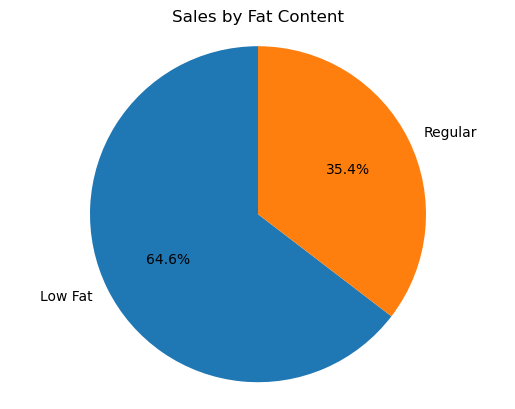

In [12]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.figure()
plt.pie(
    sales_by_fat,
    labels=sales_by_fat.index,
    autopct='%.1f%%',
    startangle=90
)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

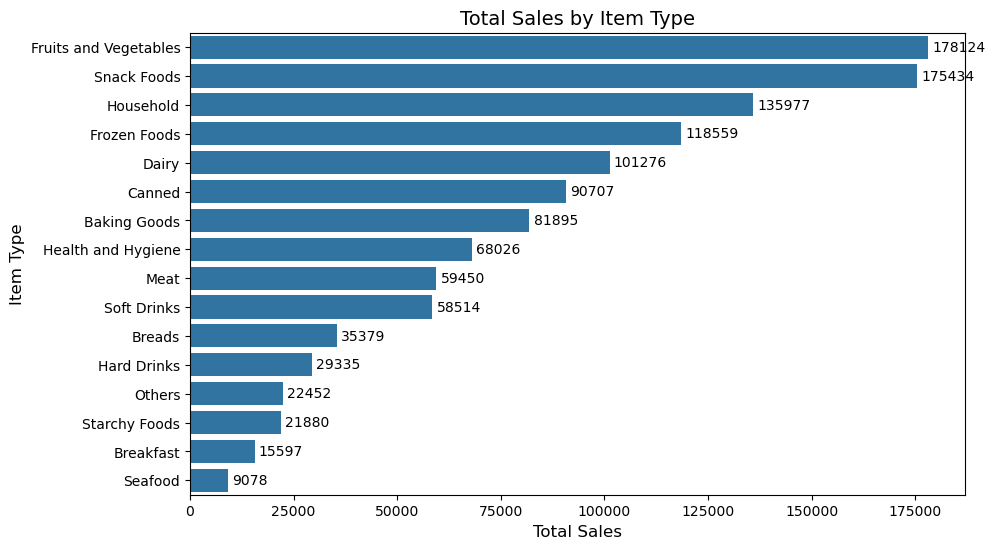

In [13]:
# Group data to get total sales by item type
sales_by_type = df.groupby("Item Type", as_index=False)["Sales"].sum()

# Sort by Sales descending
sales_by_type = sales_by_type.sort_values("Sales", ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    x='Sales',
    y='Item Type',
    data=sales_by_type,
    ax=ax
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=10, padding=3)

ax.set_title("Total Sales by Item Type", fontsize=14)
ax.set_xlabel("Total Sales", fontsize=12)
ax.set_ylabel("Item Type", fontsize=12)

plt.show()

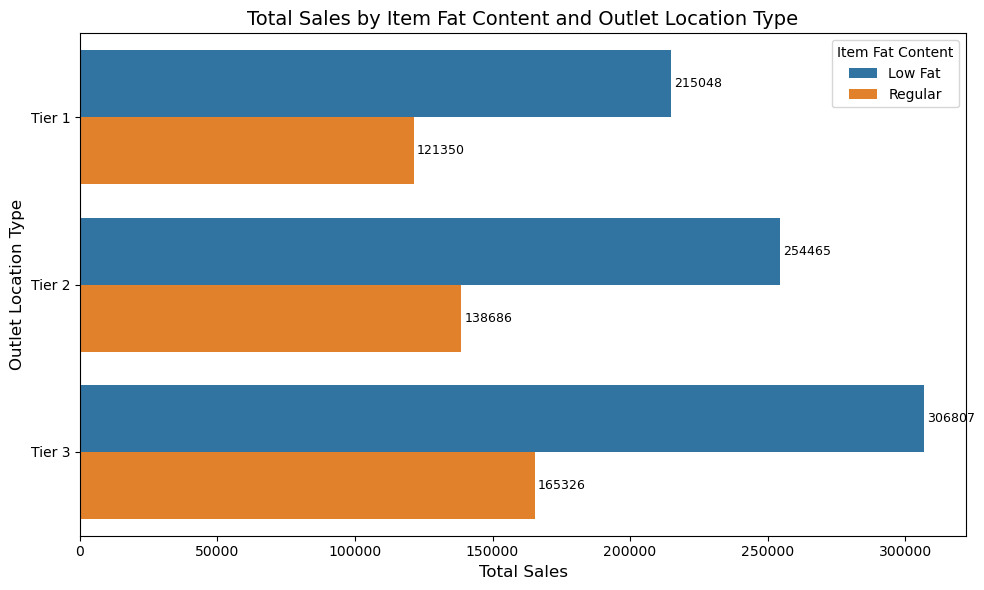

In [14]:
# Clean fat content labels (VERY important for correct grouping)
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

# Group the data
fat_outlet_sales = (
    df.groupby(["Item Fat Content", "Outlet Location Type"])["Sales"]
      .sum()
      .reset_index()
)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    y="Outlet Location Type",
    x="Sales",
    hue="Item Fat Content",
    data=fat_outlet_sales,
    ax=ax
)

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=9, padding=2)

# Titles and labels
ax.set_title("Total Sales by Item Fat Content and Outlet Location Type", fontsize=14)
ax.set_ylabel("Outlet Location Type", fontsize=12)
ax.set_xlabel("Total Sales", fontsize=12)

plt.tight_layout()
plt.show()

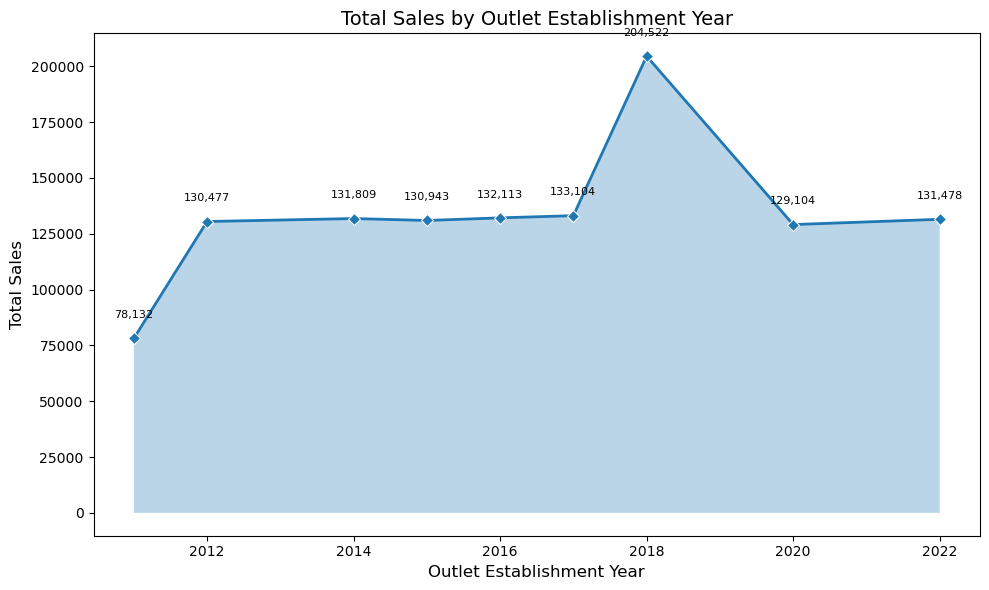

In [15]:
# Group data by Outlet Establishment Year
establishment_sales = (
    df.groupby("Outlet Establishment Year")["Sales"]
      .sum()
      .reset_index()
      .sort_values("Outlet Establishment Year")
)

# Plot
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=establishment_sales,
    x="Outlet Establishment Year",
    y="Sales",
    marker="D",
    linewidth=2
)

# Fill area under the curve
plt.fill_between(
    establishment_sales["Outlet Establishment Year"],
    establishment_sales["Sales"],
    alpha=0.3
)

# Add data labels
max_sales = establishment_sales["Sales"].max()
for x, y in zip(establishment_sales["Outlet Establishment Year"],
                establishment_sales["Sales"]):
    plt.text(
        x,
        y + (0.04 * max_sales),
        f"{y:,.0f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

# Titles and labels
plt.title("Total Sales by Outlet Establishment Year", fontsize=14)
plt.xlabel("Outlet Establishment Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

plt.tight_layout()
plt.show()

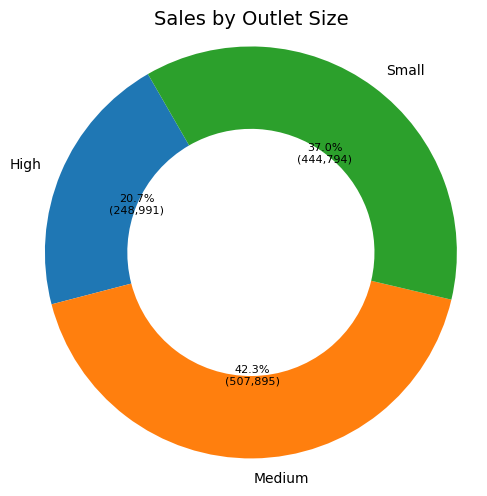

In [16]:
# Group sales by Outlet Size
sales_by_size = df.groupby("Outlet Size", as_index=False)["Sales"].sum()

# Donut chart
fig, ax = plt.subplots(figsize=(5, 5))

total_sales = sales_by_size["Sales"].sum()

wedges, texts, autotexts = ax.pie(
    sales_by_size["Sales"],
    labels=sales_by_size["Outlet Size"],
    autopct=lambda p: f"{p:.1f}%\n({int(p*total_sales/100):,})",
    startangle=120,
    colors=sns.color_palette("tab10"),
    wedgeprops=dict(width=0.4)
)

# Styling labels
for text in texts:
    text.set_fontsize(10)

for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(8)

ax.set_title("Sales by Outlet Size", fontsize=14)
ax.axis("equal")

plt.tight_layout()
plt.show()

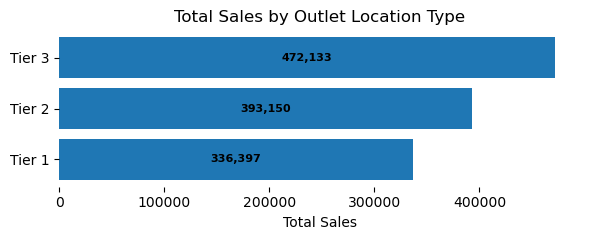

In [17]:
# Group sales by Outlet Location Type
sales_by_location = df.groupby(
    "Outlet Location Type", as_index=False
)["Sales"].sum()

# Sort ascending to create funnel effect
sales_by_location = sales_by_location.sort_values("Sales", ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(6, 2.5))

bars = ax.barh(
    y=sales_by_location["Outlet Location Type"],
    width=sales_by_location["Sales"]
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width / 2,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width):,}",
        ha="center",
        va="center",
        fontsize=8,
        fontweight="bold"
    )

# Clean look
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_xlabel("Total Sales", fontsize=10)
ax.set_ylabel("")
ax.set_title("Total Sales by Outlet Location Type", fontsize=12)

plt.tight_layout()
plt.show()

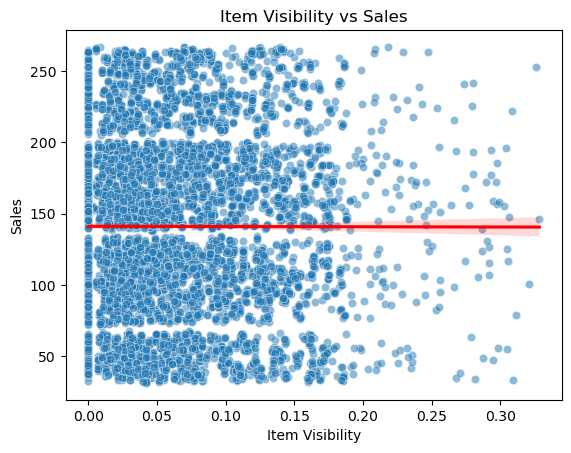

In [18]:
sns.scatterplot(
    data=df,
    x="Item Visibility",
    y="Sales",
    alpha=0.5
)
sns.regplot(
    data=df,
    x="Item Visibility",
    y="Sales",
    scatter=False,
    color="red"
)
plt.title("Item Visibility vs Sales")
plt.show()

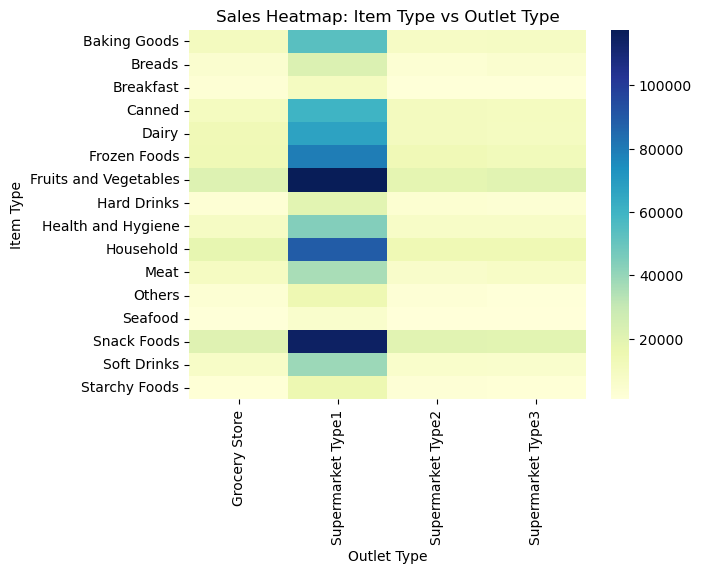

In [19]:
pivot = pd.pivot_table(
    df,
    values="Sales",
    index="Item Type",
    columns="Outlet Type",
    aggfunc="sum"
)

sns.heatmap(pivot, annot=False, cmap="YlGnBu")
plt.title("Sales Heatmap: Item Type vs Outlet Type")
plt.show()

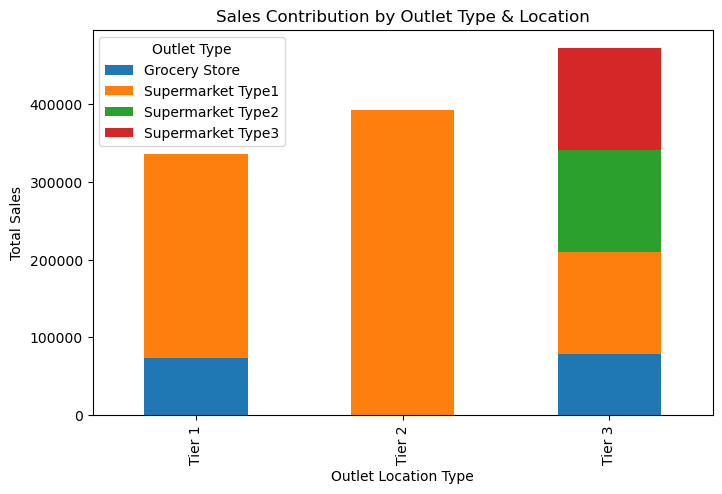

In [20]:
stacked = pd.pivot_table(
    df,
    values="Sales",
    index="Outlet Location Type",
    columns="Outlet Type",
    aggfunc="sum"
)

stacked.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Sales Contribution by Outlet Type & Location")
plt.ylabel("Total Sales")
plt.show()

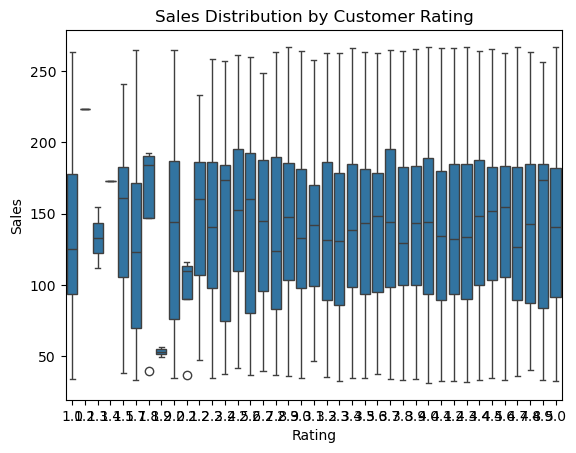

In [21]:
sns.boxplot(
    data=df,
    x="Rating",
    y="Sales"
)
plt.title("Sales Distribution by Customer Rating")
plt.show()

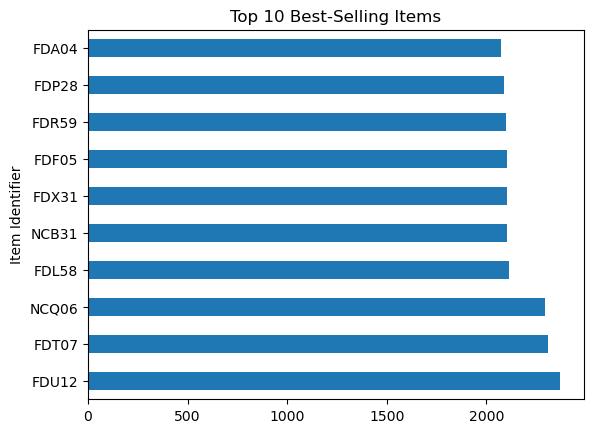

In [22]:
top_items = (
    df.groupby("Item Identifier")["Sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_items.plot(kind="barh", title="Top 10 Best-Selling Items")
plt.show()

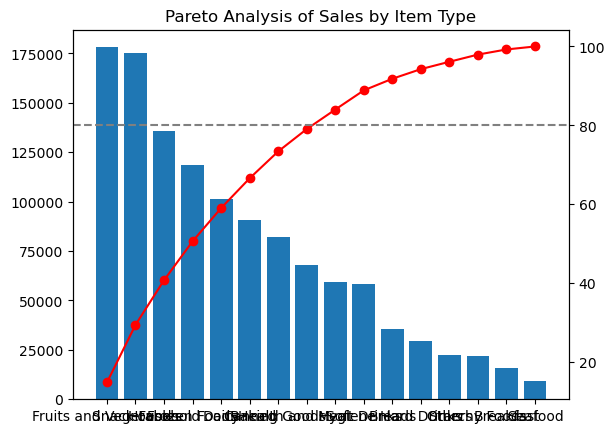

In [23]:
item_sales = (
    df.groupby("Item Type")["Sales"]
      .sum()
      .sort_values(ascending=False)
)

cum_pct = item_sales.cumsum() / item_sales.sum() * 100

fig, ax1 = plt.subplots()
ax1.bar(item_sales.index, item_sales.values)
ax2 = ax1.twinx()
ax2.plot(item_sales.index, cum_pct, color="red", marker="o")
ax2.axhline(80, color="gray", linestyle="--")

plt.xticks(rotation=45)
plt.title("Pareto Analysis of Sales by Item Type")
plt.show()